<a href="https://colab.research.google.com/github/Upendra4204/Upendra4204/blob/main/yahoo_stockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving yahoo_stockprice.csv to yahoo_stockprice.csv


In [ ]:
import pandas as pd
data=pd.read_csv('yahoo_stockprice.csv')
df=pd.DataFrame(data)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-01,32.490002,32.869999,31.850000,32.410000,31.887709,76300
1,2023-02-02,32.779999,33.090000,32.369999,32.700001,32.173031,63600
2,2023-02-03,32.340000,33.110001,32.099998,32.660000,32.245106,106400
3,2023-02-06,32.669998,32.980000,32.169998,32.490002,32.077263,124000
4,2023-02-07,32.389999,32.389999,31.709999,32.200001,31.790947,69800
5,2023-02-08,32.130001,32.130001,31.270000,31.400000,31.001110,67800
6,2023-02-09,31.680000,31.809999,30.650000,30.680000,30.290257,73800
7,2023-02-10,30.760000,31.709999,30.620001,31.620001,31.218315,74800
8,2023-02-13,31.660000,32.529999,31.549999,32.500000,32.087139,82800
9,2023-02-14,32.380001,32.980000,32.310001,32.730000,32.314213,78000


##Based on the columns present, the "Close" or "Adj Close" column is typically considered the target variable in stock price datasets, as these columns represent the final price of the stock at the end of the trading day. "Adj Close" is adjusted for actions such as stock splits, dividends, and rights offerings, making it a more accurate reflection of the stock's value.

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,28.234365,28.626905,27.777817,28.181468,27.981675,98203.571429
std,3.787942,3.811871,3.785295,3.777395,3.664353,63854.896101
min,20.660000,21.280001,18.059999,20.150000,20.150000,24700.000000
25%,25.007500,25.385000,24.500000,25.039999,25.029508,63275.000000
50%,28.280000,28.610000,27.970000,28.215000,27.920479,84300.000000
75%,31.382499,31.802499,30.802499,31.352500,31.061110,115200.000000
max,35.330002,35.990002,33.860001,35.459999,35.009537,582600.000000


In [ ]:
# Identify outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print the number of outliers detected
print(f'Number of outliers detected: {outliers.sum()}')

# Remove outliers
data_no_outliers = df[~outliers]

# Print the shape of the new dataframe
print(f'New dataframe shape: {data_no_outliers.shape}')

Number of outliers detected: 13
New dataframe shape: (239, 7)


<ipython-input-6-418d10639f28>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-6-418d10639f28>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-6-418d10639f28>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)


In [ ]:
df=data_no_outliers

<ipython-input-9-9e1f4b3b66ff>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_no_outliers.corr()


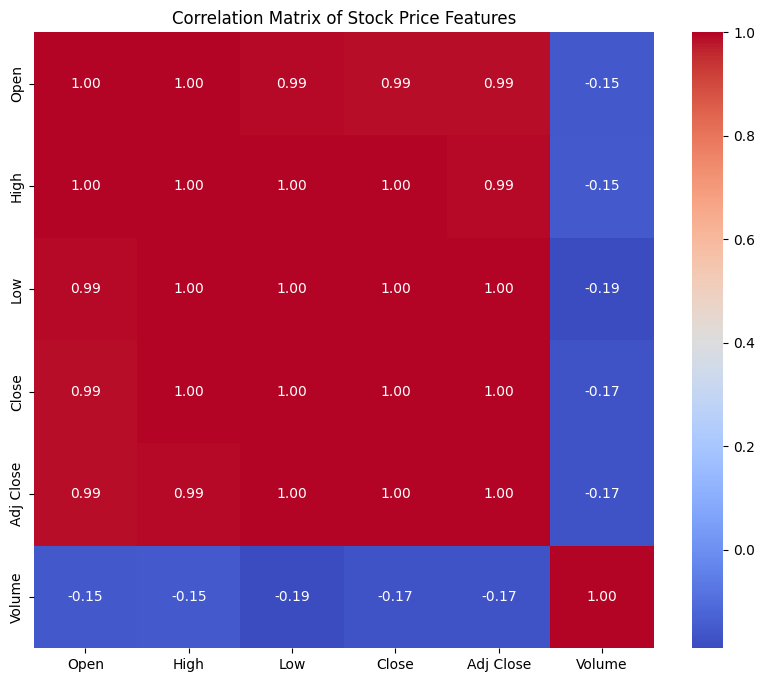

Correlation with Adj Close:
Adj Close    1.000000
Close        0.999632
Low          0.996190
High         0.994983
Open         0.989030
Volume      -0.170119
Name: Adj Close, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = data_no_outliers.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stock Price Features')
plt.show()

# Print the correlation values with the target variable 'Adj Close'
print('Correlation with Adj Close:')
corr_with_target = corr_matrix['Adj Close'].sort_values(ascending=False)
print(corr_with_target)

## Except volume column everyfeature is performinf weill my target(adjclose) im gonna drop adj column now

In [ ]:
df=df.drop(['Volume'],axis=1)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with features and target column 'Adj Close'
# Extracting features (X) and target (y)
X = df.drop(['Date','Adj Close'], axis=1)
y = df['Adj Close']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Decision Tree Regressor with hyperparameters
# You can adjust these hyperparameters based on your specific needs
# For example, you might want to tune 'max_depth', 'min_samples_split', etc.
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=42)

# Fit the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.026397163784187393


In [ ]:
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = dt_model.predict(X_train_scaled)

# Calculate Mean Squared Error on training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error on Training Data: {mse_train}')

Mean Squared Error on Training Data: 0.0


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)


In [ ]:
r2

0.9982701133341101